CS573100 Music Information Retrieval

DDL: 2023.5.9.

Description: Homework 2. Intrument and pitch classification.

Requirements:
1. Name you file as HW2_{student-id}.ipynb and submit to eeclass.
2. Strongly recommend writing the report on your jupyter notebook file.

In [ ]:
!pip install mirdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 80.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592303 sha256=b6a008b92204322e376b1f7a35a97a3d581e064cfaf73f0df15262e5c92c43ac
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64923 sha256=2077597b15b7ecb902e911e0d95

In [ ]:
import librosa
import tensorflow as tf


# Load TinySOL metadata
# Import mirdata library
import mirdata

# Initialize tinysol dat

tinysol_dataset = mirdata.initialize("tinysol")
tinysol_dataset.download()
# Load tinysol metadata
tinysol_metadata = tinysol_dataset._metadata




979MB [03:09, 5.42MB/s]                           
312kB [00:00, 393kB/s]                             


#Feature Extraction

In [ ]:
import numpy as np
# Create empty lists to store MFCC features and labels
mfccs_list = []
instrument_list = []
pitch_list = []

# Iterate through all the tracks in the dataset
for track_id in tinysol_dataset.track_ids:

  # Load a track by its ID
  track = tinysol_dataset.track(track_id)

  # Print some track information
  print("Track ID:", track.track_id)
  print("Instrument name:", track.instrument_full)
  print("Pitch class:", track.pitch)
  #print("Dynamics:", track.dynamics)

  # Load and play the audio file of the track
  audio, sr = track.audio
  #track.play_audio()

  # TODO:  IMPLEMENT FEATURE EXTRACTION
  mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=39)

  for i in range(mfccs.shape[1]):
        mfccs_list.append(mfccs[:, i])
        instrument_list.append(track.instrument_full)
        pitch_list.append(track.pitch)

# Convert the lists to numpy arrays for tensorflow compatibility
mfccs_array = np.array(mfccs_list)
instrument_array = np.array(instrument_list)
pitch_array = np.array(pitch_list)






串流輸出內容已截斷至最後 5000 行。
Instrument name: Cello
Pitch class: F2
Track ID: Vc-ord-F#2-mf-4c-N
Instrument name: Cello
Pitch class: F#2
Track ID: Vc-ord-G2-mf-3c-N
Instrument name: Cello
Pitch class: G2
Track ID: Vc-ord-G2-mf-4c-N
Instrument name: Cello
Pitch class: G2
Track ID: Vc-ord-G#2-mf-3c-N
Instrument name: Cello
Pitch class: G#2
Track ID: Vc-ord-G#2-mf-4c-N
Instrument name: Cello
Pitch class: G#2
Track ID: Vc-ord-A2-mf-3c-N
Instrument name: Cello
Pitch class: A2
Track ID: Vc-ord-A2-mf-4c-N
Instrument name: Cello
Pitch class: A2
Track ID: Vc-ord-A#2-mf-3c-T13u
Instrument name: Cello
Pitch class: A#2
Track ID: Vc-ord-A#2-mf-4c-N
Instrument name: Cello
Pitch class: A#2
Track ID: Vc-ord-B2-mf-3c-N
Instrument name: Cello
Pitch class: B2
Track ID: Vc-ord-B2-mf-4c-T20u
Instrument name: Cello
Pitch class: B2
Track ID: Vc-ord-C3-mf-3c-N
Instrument name: Cello
Pitch class: C3
Track ID: Vc-ord-C3-mf-4c-N
Instrument name: Cello
Pitch class: C3
Track ID: Vc-ord-C#3-mf-3c-N
Instrument name: Cello
P

In [ ]:
# Convert the lists to numpy arrays for tensorflow compatibility[^2^][2] [^3^][3]
mfccs_array = np.array(mfccs_list)
instrument_array = np.array(instrument_list)
pitch_array = np.array(pitch_list)

#Encode labels

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
instrument_array = le.fit_transform(instrument_array)
instr_classes = le.classes_
print(instr_classes)
pitch_array = le.fit_transform(pitch_array)
pitch_classes = le.classes_
print(pitch_classes)

['Accordion' 'Alto Saxophone' 'Bass Tuba' 'Bassoon' 'Cello'
 'Clarinet in Bb' 'Contrabass' 'Flute' 'French Horn' 'Oboe' 'Trombone'
 'Trumpet in C' 'Viola' 'Violin']
['A#1' 'A#2' 'A#3' 'A#4' 'A#5' 'A#6' 'A#7' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6'
 'A7' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'C#2' 'C#3' 'C#4' 'C#5' 'C#6'
 'C#7' 'C#8' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'D#2' 'D#3' 'D#4' 'D#5'
 'D#6' 'D#7' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'F#1' 'F#2' 'F#3' 'F#4' 'F#5' 'F#6' 'F#7' 'F1' 'F2' 'F3' 'F4' 'F5'
 'F6' 'F7' 'G#1' 'G#2' 'G#3' 'G#4' 'G#5' 'G#6' 'G#7' 'G1' 'G2' 'G3' 'G4'
 'G5' 'G6' 'G7']


#Split Training Set and Testing Set 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_instrument, y_test_instrument, y_train_pitch, y_test_pitch = train_test_split(
    mfccs_array, instrument_array, pitch_array,test_size=0.2, random_state=23) # DON'T Modify Random_state!


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(40, 30))

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

##Instrument Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [ ]:
# Import scikit-learn library for SVM model and K-fold cross-validation
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# Create a model for Intstrument Classification
model = DecisionTreeClassifier()
# model = MLPClassifier(random_state=1, max_iter=300)
# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  model.fit(X_train_kfold, y_train_kfold_instrument)
  # TODO:　Evaluate your model  using the validation subset
  # y_val_pred_instr = model.predict(X_val_kfold)
  # print("Validation score:", accuracy_score(y_test_instrument, y_val_pred_instr))

# TODO: Evaluate your model using the test set
y_pred_instr = model.predict(X_test)
# accuracy_score(y_test_pitch, y_pred_pitch)
print("Test score:", accuracy_score(y_test_instrument, y_pred_instr))

Test score: 0.9526847849755847


Normalized confusion matrix


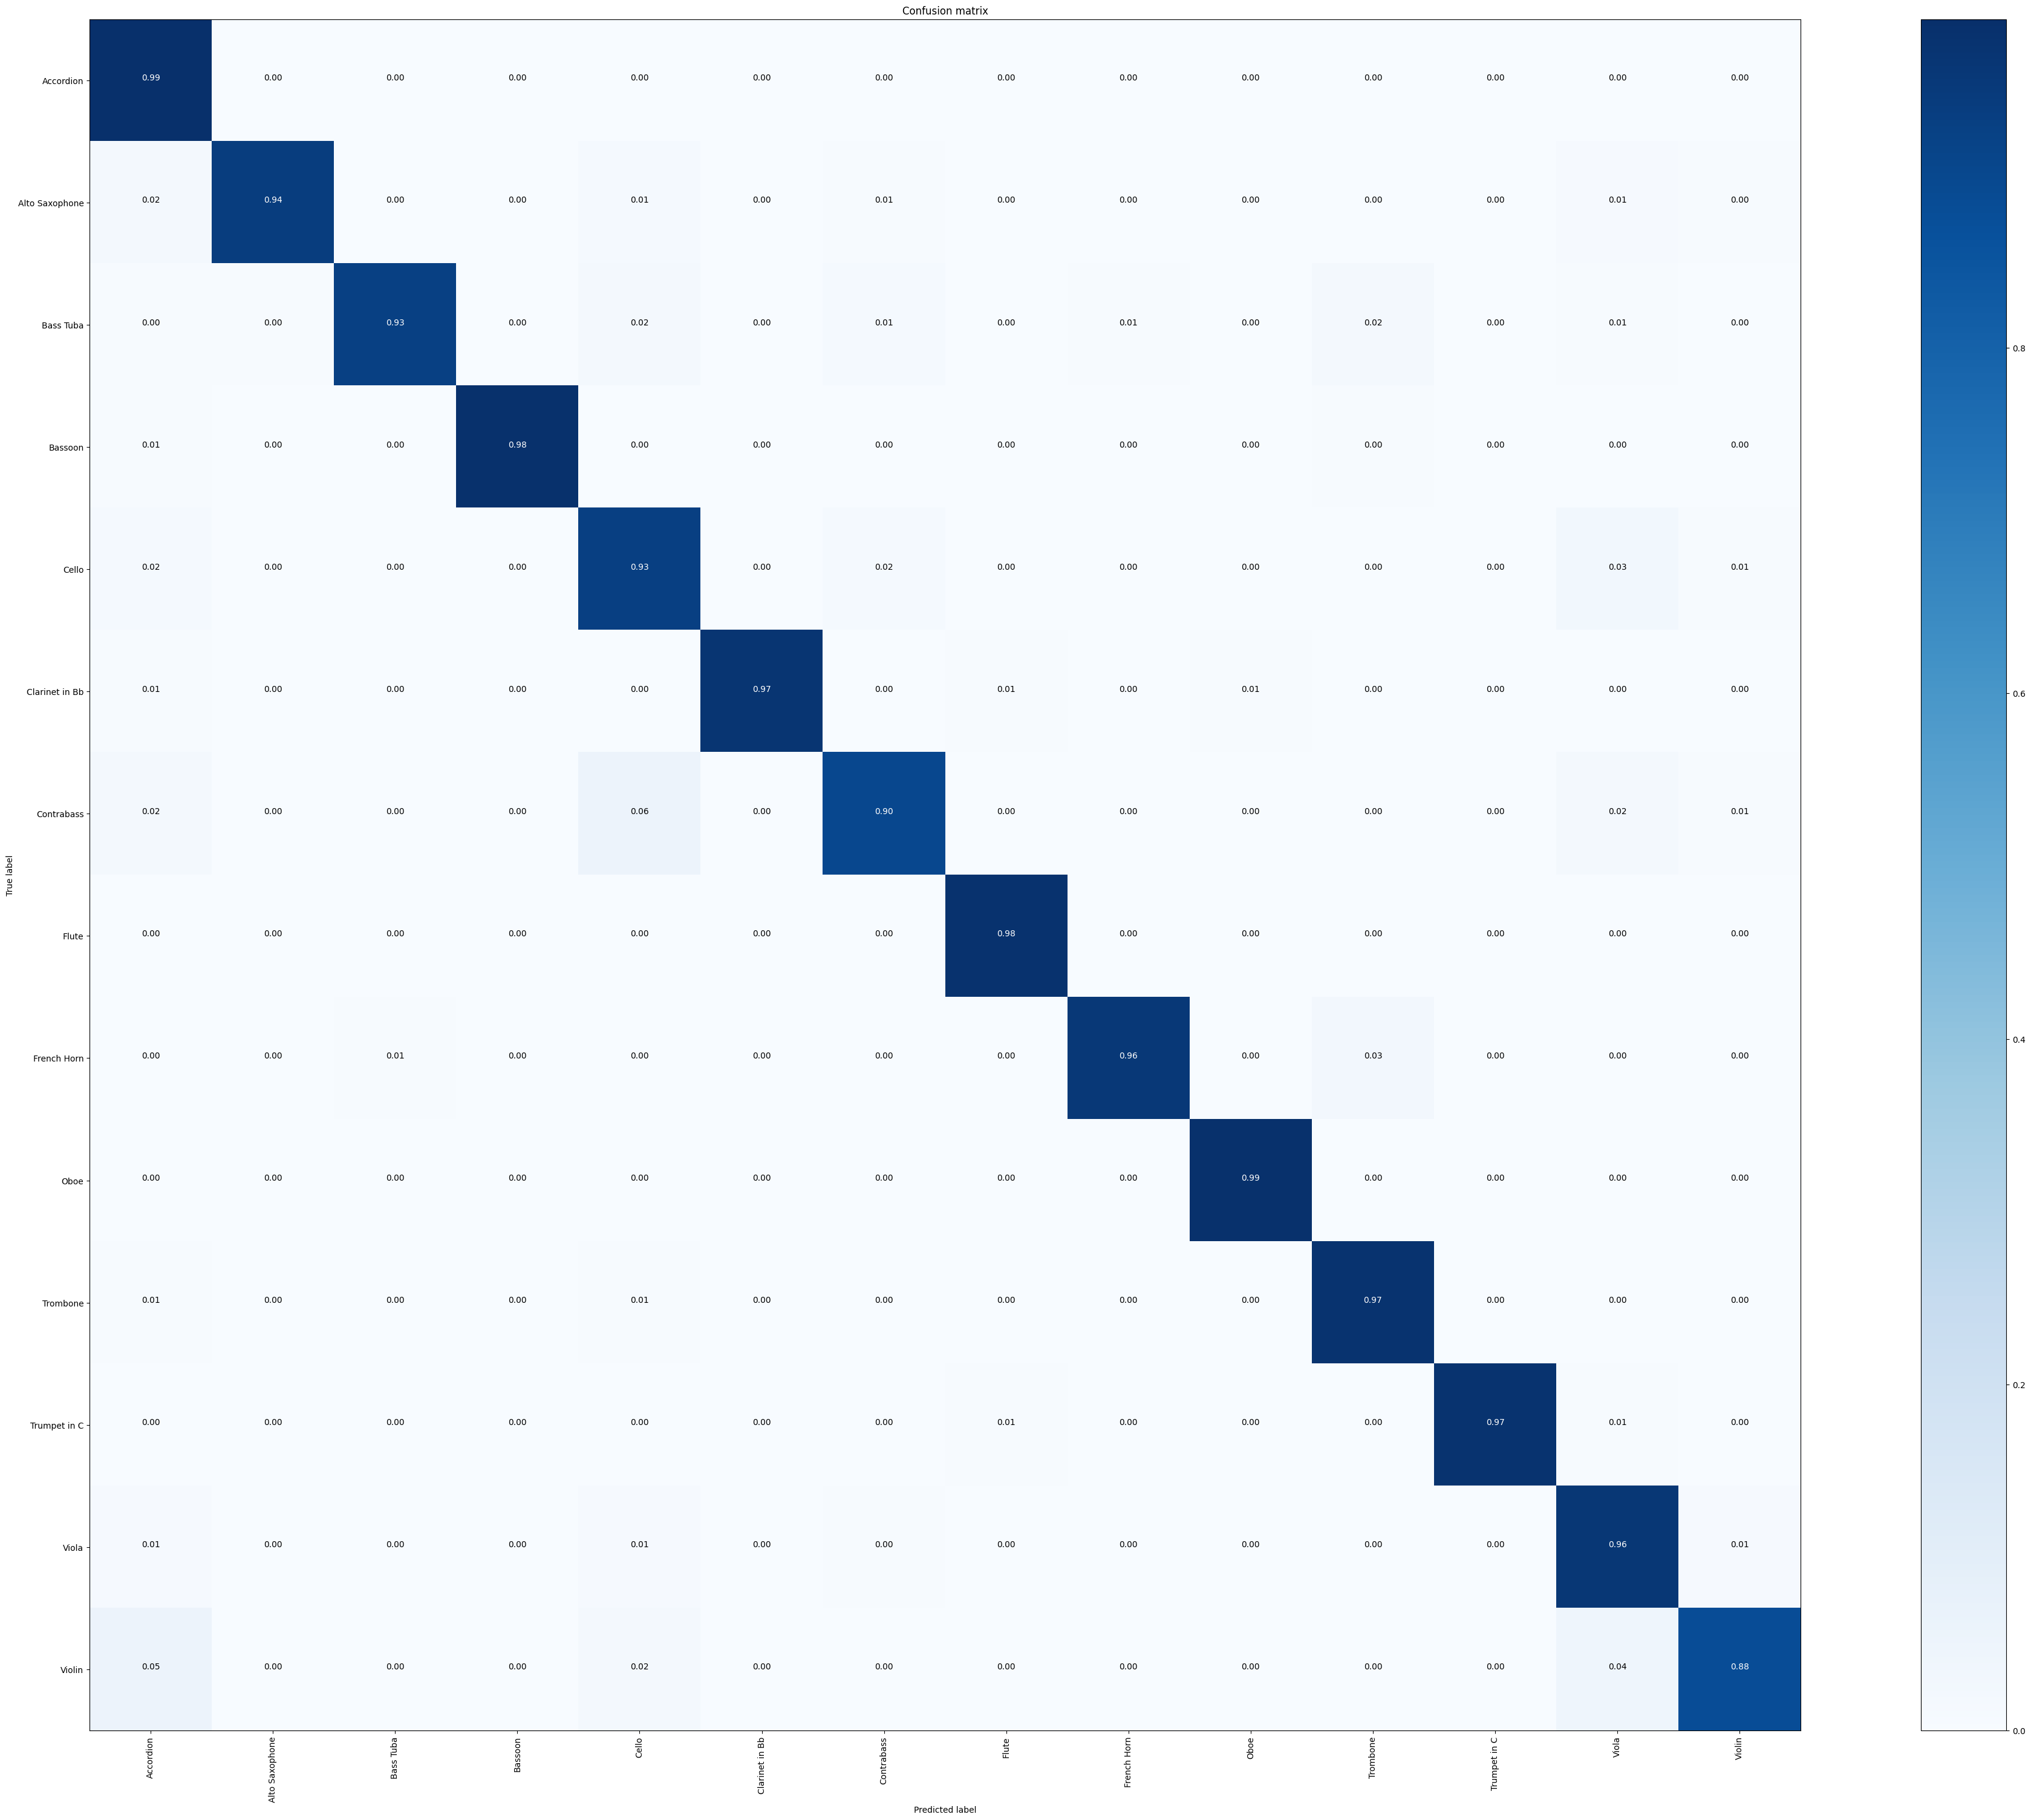

ACC =  0.953
precision =  0.953
recall =  0.953


In [ ]:

accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes,normalize=True)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

##Pitch Classification

In [ ]:
# Create a model for Pitch Classification
model = DecisionTreeClassifier()
# model = MLPClassifier(random_state=1, max_iter=300)
# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
  model.fit(X_train_kfold, y_train_kfold_pitch)
  # TODO:　Evaluate your model  using the validation subset
  # y_val_pred_pitch = model.predict(X_val_kfold)
  # print("Validation score:", score)

# TODO: Evaluate the model on the instrument label using the test set
y_pred_pitch = model.predict(X_test)
# accuracy_score(y_test_pitch, y_pred_pitch)
print("Test score:", accuracy_score(y_test_pitch, y_pred_pitch))

Test score: 0.8673044168225247


Normalized confusion matrix


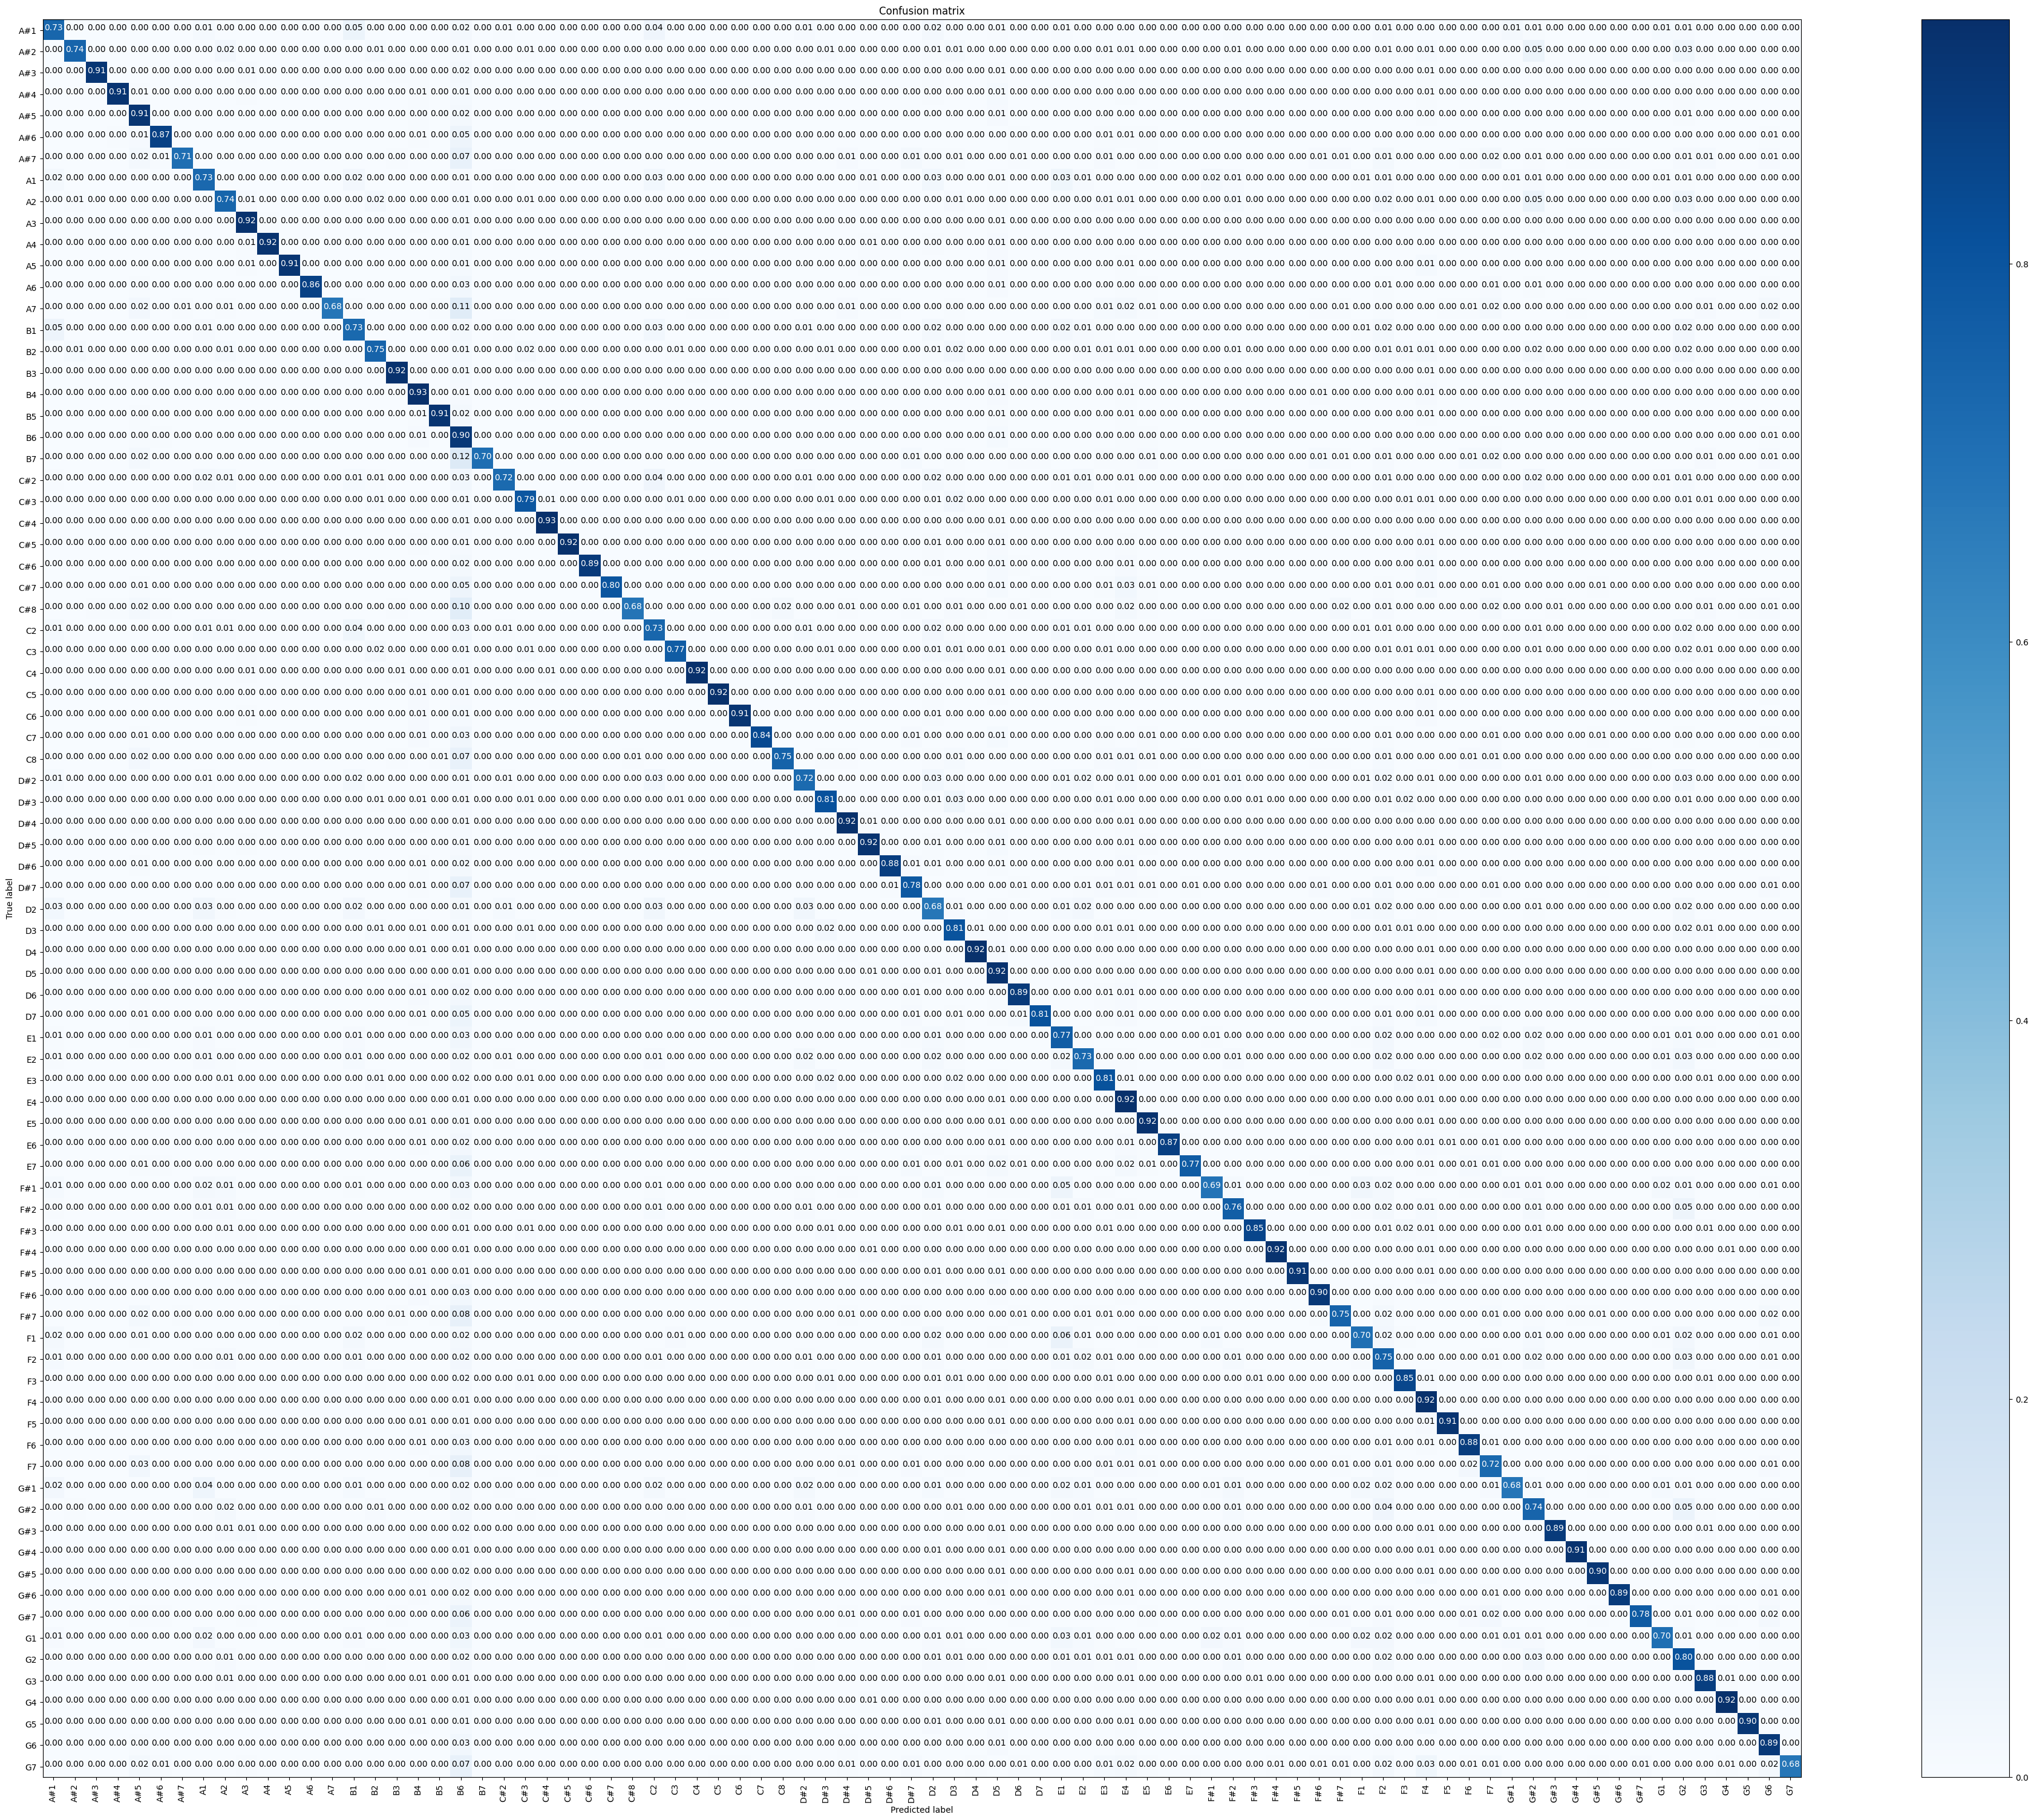

ACC =  0.867
precision =  0.8673044168225247
recall =  0.8673044168225247


In [ ]:
# y_pred_pitch = svm_pitch.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average='micro')
cm = confusion_matrix(y_test_pitch, y_pred_pitch)
plot_confusion_matrix(cm , pitch_classes,normalize=True)
print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)